In [1]:
#Import required packages 

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns


In [2]:
#load dataset

In [3]:
a_dataset = pd.read_csv("train_data.csv")
test_dataset = pd.read_csv("test_data.csv")

In [4]:
arr = np.array([[1, 2, 3], [4, 5, 6]])
arr2 = np.array([[ 24, 33], [55, 56]])

np.concatenate([arr, arr2], axis = 1)



array([[ 1,  2,  3, 24, 33],
       [ 4,  5,  6, 55, 56]])

In [5]:
#Print dataset information

In [6]:
a_dataset['TypeOfAdmission'].unique()

array(['Newborn', 'Emergency', 'Elective', 'Urgent'], dtype=object)

# EDA
## Excluding columns
Look at the data below and the provided text file outlining the data value for each column
The first two columns ID, HealthServiceArea provide no real use in our dataframe. 
## Onehot encoding 
Looking at the various columns, there are various categorical values such as Gender, Race, TypeOfAdmission, CCSProcedureCode,APRSeverityOfIllnessCode, PaymentTypology and EmergencyDepartmentIndicator.

Looking at these columns further I believe that all are able to one hot encoded except APRSeverityOfIllness Code as these can be considered ordinal from 1 (Minor) to 4 (Extreme)

In [7]:
print(a_dataset)

          ID HealthServiceArea Gender                    Race TypeOfAdmission  \
0          1     New York City      F              Other Race         Newborn   
1          2     New York City      M  Black/African American         Newborn   
2          3     New York City      M              Other Race         Newborn   
3          4     New York City      F              Other Race         Newborn   
4          5     New York City      F              Other Race         Newborn   
...      ...               ...    ...                     ...             ...   
59961  59962        Western NY      M  Black/African American         Newborn   
59962  59963        Western NY      M                   White         Newborn   
59963  59964        Western NY      M                   White         Newborn   
59964  59965        Western NY      M                   White         Newborn   
59965  59966        Western NY      F                   White         Newborn   

       CCSProcedureCode  AP

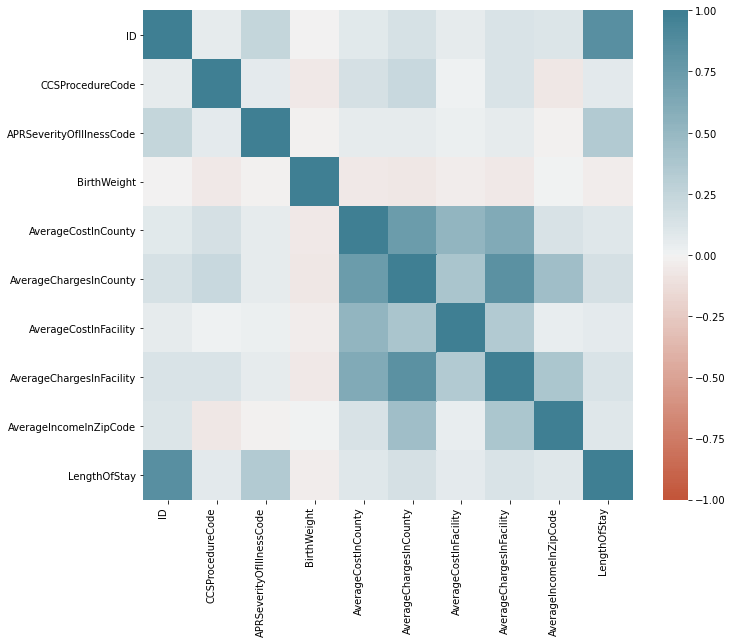

In [8]:
f, ax = plt.subplots(figsize=(11, 9))
corr = a_dataset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [9]:
a_dataset['PaymentTypology'].unique()

array(['Medicaid', 'Private Health Insurance', 'Blue Cross/Blue Shield',
       'Self-Pay', 'Managed Care, Unspecified', 'Miscellaneous/Other',
       'Federal/State/Local/VA', 'Medicare', 'Unknown'], dtype=object)

In [10]:
# Remove ID 

In [11]:
a_dataset = a_dataset.drop(columns = ['ID'])
test_dataset = test_dataset.drop(columns = ['ID'])

In [12]:
a_dataset = a_dataset.drop(columns = ['HealthServiceArea'])
test_dataset = test_dataset.drop(columns = ['HealthServiceArea'])

In [13]:
# One-hot encoding, specifically Gender(M, F, U), Race(Black/African American, Multi, Other Race, Unkown, White, Other Race),  TypeOfAdmission(Elective, Emergency, Newborn, Not Available, Trauma, Urgent)
# APRSeverityOfIllnessCode(Minor (1), Moderate (2),   Major (3), Extreme (4)), 
#PaymentTypology('Medicaid', 'Blue Cross/Blue Shield', 'Private Health Insurance', 'Medicare', 'Managed Care, Unspecified', 'Self-Pay', 'Unknown', 'Federal/State/Local/VA', 'Miscellaneous/Other','Department of Corrections')
#EmergencyDepartmentIndicator(Y, N) 

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
OneHotEncoder_Gender = OneHotEncoder(handle_unknown ='ignore')
OneHotEncoder_Gender.fit(a_dataset[['Gender']])

test_OneHotEncoder_Gender = OneHotEncoder(handle_unknown ='ignore')
test_OneHotEncoder_Gender.fit(test_dataset[['Gender']])

onehot_ = OneHotEncoder_Gender.transform(a_dataset[['Gender']]).toarray()
test_onehot_ = test_OneHotEncoder_Gender.transform(test_dataset[['Gender']]).toarray()
print(test_onehot_)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [16]:
print(onehot_.shape, OneHotEncoder_Gender.categories_)

(59966, 3) [array(['F', 'M', 'U'], dtype=object)]


In [17]:
# Begin One hot encoding for 'Gender'

In [18]:
colname = 'Gender'
for i in range(len(OneHotEncoder_Gender.categories_[0])):
    a_dataset[colname + '_' + str(OneHotEncoder_Gender.categories_[0][i])] = onehot_[:,i]
    
for i in range(len(test_OneHotEncoder_Gender.categories_[0])):
    test_dataset[colname + '_' + str(test_OneHotEncoder_Gender.categories_[0][i])] = test_onehot_[:,i]

In [19]:

a_dataset.head()

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,Gender_F,Gender_M,Gender_U
0,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1,1.0,0.0,0.0
1,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1,0.0,1.0,0.0
2,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1,0.0,1.0,0.0
3,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1,1.0,0.0,0.0
4,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1,1.0,0.0,0.0


In [20]:
a_dataset = a_dataset.drop(columns = ['Gender'])
test_dataset = test_dataset.drop(columns = ['Gender'])

In [21]:
a_dataset['TypeOfAdmission'].unique()

array(['Newborn', 'Emergency', 'Elective', 'Urgent'], dtype=object)

In [22]:
## Do every other categorical column

In [23]:
OneHotEncoder_TypeOfAdmission = OneHotEncoder(handle_unknown ='ignore')
OneHotEncoder_TypeOfAdmission.fit(a_dataset[['TypeOfAdmission']])

test_OneHotEncoder_TypeOfAdmission = OneHotEncoder(handle_unknown ='ignore')
test_OneHotEncoder_TypeOfAdmission.fit(test_dataset[['TypeOfAdmission']])

onehot_ = OneHotEncoder_TypeOfAdmission.transform(a_dataset[['TypeOfAdmission']]).toarray()
test_onehot_  = test_OneHotEncoder_TypeOfAdmission.transform(test_dataset[['TypeOfAdmission']]).toarray()

colname = 'TypeOfAdmission'

for i in range(len(OneHotEncoder_TypeOfAdmission.categories_[0])):
    a_dataset[colname + '_' + str(OneHotEncoder_TypeOfAdmission.categories_[0][i])] = onehot_[:,i]
    
for i in range(len(test_OneHotEncoder_TypeOfAdmission.categories_[0])):
    test_dataset[colname + '_' + str(test_OneHotEncoder_TypeOfAdmission.categories_[0][i])] = test_onehot_[:,i]
    

In [24]:
print(test_OneHotEncoder_TypeOfAdmission.categories_, OneHotEncoder_TypeOfAdmission.categories_)


[array(['Elective', 'Emergency', 'Newborn', 'Trauma', 'Urgent'],
      dtype=object)] [array(['Elective', 'Emergency', 'Newborn', 'Urgent'], dtype=object)]


In [25]:
a_dataset = a_dataset.drop(columns = ['TypeOfAdmission'])
test_dataset = test_dataset.drop(columns = ['TypeOfAdmission'])

In [26]:
OneHotEncoder_Race = OneHotEncoder(handle_unknown ='ignore')
OneHotEncoder_Race.fit(a_dataset[['Race']])

test_OneHotEncoder_Race = OneHotEncoder(handle_unknown ='ignore')
test_OneHotEncoder_Race.fit(test_dataset[['Race']])

onehot_ = OneHotEncoder_Race.transform(a_dataset[['Race']]).toarray()
test_onehot_ = test_OneHotEncoder_Race.transform(test_dataset[['Race']]).toarray()

colname = 'Race'
for i in range(len(OneHotEncoder_Race.categories_[0])):
    a_dataset[colname + '_' + str(OneHotEncoder_Race.categories_[0][i])] = onehot_[:,i]

for i in range(len(test_OneHotEncoder_Race.categories_[0])):
    test_dataset[colname + '_' + str(test_OneHotEncoder_Race.categories_[0][i])] = test_onehot_[:,i]


In [27]:
a_dataset = a_dataset.drop(columns = ['Race'])



In [28]:
a_dataset.insert(18, "TypeOfAdmission_Trauma", 0.0)


In [29]:
a_dataset.head()

,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,...,Gender_U,TypeOfAdmission_Elective,TypeOfAdmission_Emergency,TypeOfAdmission_Newborn,TypeOfAdmission_Urgent,TypeOfAdmission_Trauma,Race_Black/African American,Race_Multi-racial,Race_Other Race,Race_White
0,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
test_dataset = test_dataset.drop(columns = ['Race'])

In [31]:
OneHotEncoder_CCSProcedureCode = OneHotEncoder(handle_unknown ='ignore')
OneHotEncoder_CCSProcedureCode.fit(a_dataset[['CCSProcedureCode']])

test_OneHotEncoder_CCSProcedureCode = OneHotEncoder(handle_unknown ='ignore')
test_OneHotEncoder_CCSProcedureCode.fit(test_dataset[['CCSProcedureCode']])

onehot_ = OneHotEncoder_CCSProcedureCode.transform(a_dataset[['CCSProcedureCode']]).toarray()
test_onehot_ = test_OneHotEncoder_CCSProcedureCode.transform(test_dataset[['CCSProcedureCode']]).toarray()

colname = 'CCSProcedureCode'
for i in range(len(OneHotEncoder_CCSProcedureCode.categories_[0])):
    a_dataset[colname + '_' + str(OneHotEncoder_CCSProcedureCode.categories_[0][i])] = onehot_[:,i]

for i in range(len(test_OneHotEncoder_CCSProcedureCode.categories_[0])):
    test_dataset[colname + '_' + str(test_OneHotEncoder_CCSProcedureCode.categories_[0][i])] = test_onehot_[:,i]

a_dataset = a_dataset.drop(columns = ['CCSProcedureCode'])
test_dataset = test_dataset.drop(columns = ['CCSProcedureCode'])

In [32]:
test_dataset.columns

Index(['APRSeverityOfIllnessCode', 'PaymentTypology', 'BirthWeight',
       'EmergencyDepartmentIndicator', 'AverageCostInCounty',
       'AverageChargesInCounty', 'AverageCostInFacility',
       'AverageChargesInFacility', 'AverageIncomeInZipCode', 'Gender_F',
       'Gender_M', 'Gender_U', 'TypeOfAdmission_Elective',
       'TypeOfAdmission_Emergency', 'TypeOfAdmission_Newborn',
       'TypeOfAdmission_Trauma', 'TypeOfAdmission_Urgent',
       'Race_Black/African American', 'Race_Multi-racial', 'Race_Other Race',
       'Race_White', 'CCSProcedureCode_-1', 'CCSProcedureCode_0',
       'CCSProcedureCode_115', 'CCSProcedureCode_216', 'CCSProcedureCode_220',
       'CCSProcedureCode_228', 'CCSProcedureCode_231'],
      dtype='object')

In [33]:
a_dataset.loc[a_dataset.EmergencyDepartmentIndicator == "N", "EmergencyDepartmentIndicator"] = 0
a_dataset.loc[a_dataset.EmergencyDepartmentIndicator == "Y", "EmergencyDepartmentIndicator"] = 1

test_dataset.loc[test_dataset.EmergencyDepartmentIndicator == "N", "EmergencyDepartmentIndicator"] = 0
test_dataset.loc[test_dataset.EmergencyDepartmentIndicator == "Y", "EmergencyDepartmentIndicator"] = 1


In [34]:
OneHotEncoder_PaymentTypology = OneHotEncoder(handle_unknown ='ignore')
OneHotEncoder_PaymentTypology.fit(a_dataset[['PaymentTypology']])

test_OneHotEncoder_PaymentTypology = OneHotEncoder(handle_unknown ='ignore')
test_OneHotEncoder_PaymentTypology.fit(test_dataset[['PaymentTypology']])

onehot_ = OneHotEncoder_PaymentTypology.transform(a_dataset[['PaymentTypology']]).toarray()
test_onehot_ = test_OneHotEncoder_PaymentTypology.transform(test_dataset[['PaymentTypology']]).toarray()

colname = 'PaymentTypology'
for i in range(len(OneHotEncoder_PaymentTypology.categories_[0])):
    a_dataset[colname + '_' + str(OneHotEncoder_PaymentTypology.categories_[0][i])] = onehot_[:,i]
for i in range(len(test_OneHotEncoder_PaymentTypology.categories_[0])):
    test_dataset[colname + '_' + str(test_OneHotEncoder_PaymentTypology.categories_[0][i])] = test_onehot_[:,i]
    
a_dataset = a_dataset.drop(columns = ['PaymentTypology'])
test_dataset = test_dataset.drop(columns = ['PaymentTypology'])

In [35]:
a_dataset.head()

,APRSeverityOfIllnessCode,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,Gender_F,...,CCSProcedureCode_231,PaymentTypology_Blue Cross/Blue Shield,PaymentTypology_Federal/State/Local/VA,"PaymentTypology_Managed Care, Unspecified",PaymentTypology_Medicaid,PaymentTypology_Medicare,PaymentTypology_Miscellaneous/Other,PaymentTypology_Private Health Insurance,PaymentTypology_Self-Pay,PaymentTypology_Unknown
0,1,3700,0,2611,9227,1751,8951,45,1,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,2900,0,3242,8966,3338,6409,34,1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,3200,0,3155,11381,4980,9323,45,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,3300,0,3155,11381,5826,15680,59,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,2600,0,2611,9227,6000,14344,59,1,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [36]:
test_dataset.head()
a_dataset.insert(29, "PaymentTypology_Department of Corrections", '0.0')

In [37]:
a_dataset.head()

,APRSeverityOfIllnessCode,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,Gender_F,...,PaymentTypology_Blue Cross/Blue Shield,PaymentTypology_Department of Corrections,PaymentTypology_Federal/State/Local/VA,"PaymentTypology_Managed Care, Unspecified",PaymentTypology_Medicaid,PaymentTypology_Medicare,PaymentTypology_Miscellaneous/Other,PaymentTypology_Private Health Insurance,PaymentTypology_Self-Pay,PaymentTypology_Unknown
0,1,3700,0,2611,9227,1751,8951,45,1,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,2900,0,3242,8966,3338,6409,34,1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,3200,0,3155,11381,4980,9323,45,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,3300,0,3155,11381,5826,15680,59,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,2600,0,2611,9227,6000,14344,59,1,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## We will then proceed with Minmax scaling 

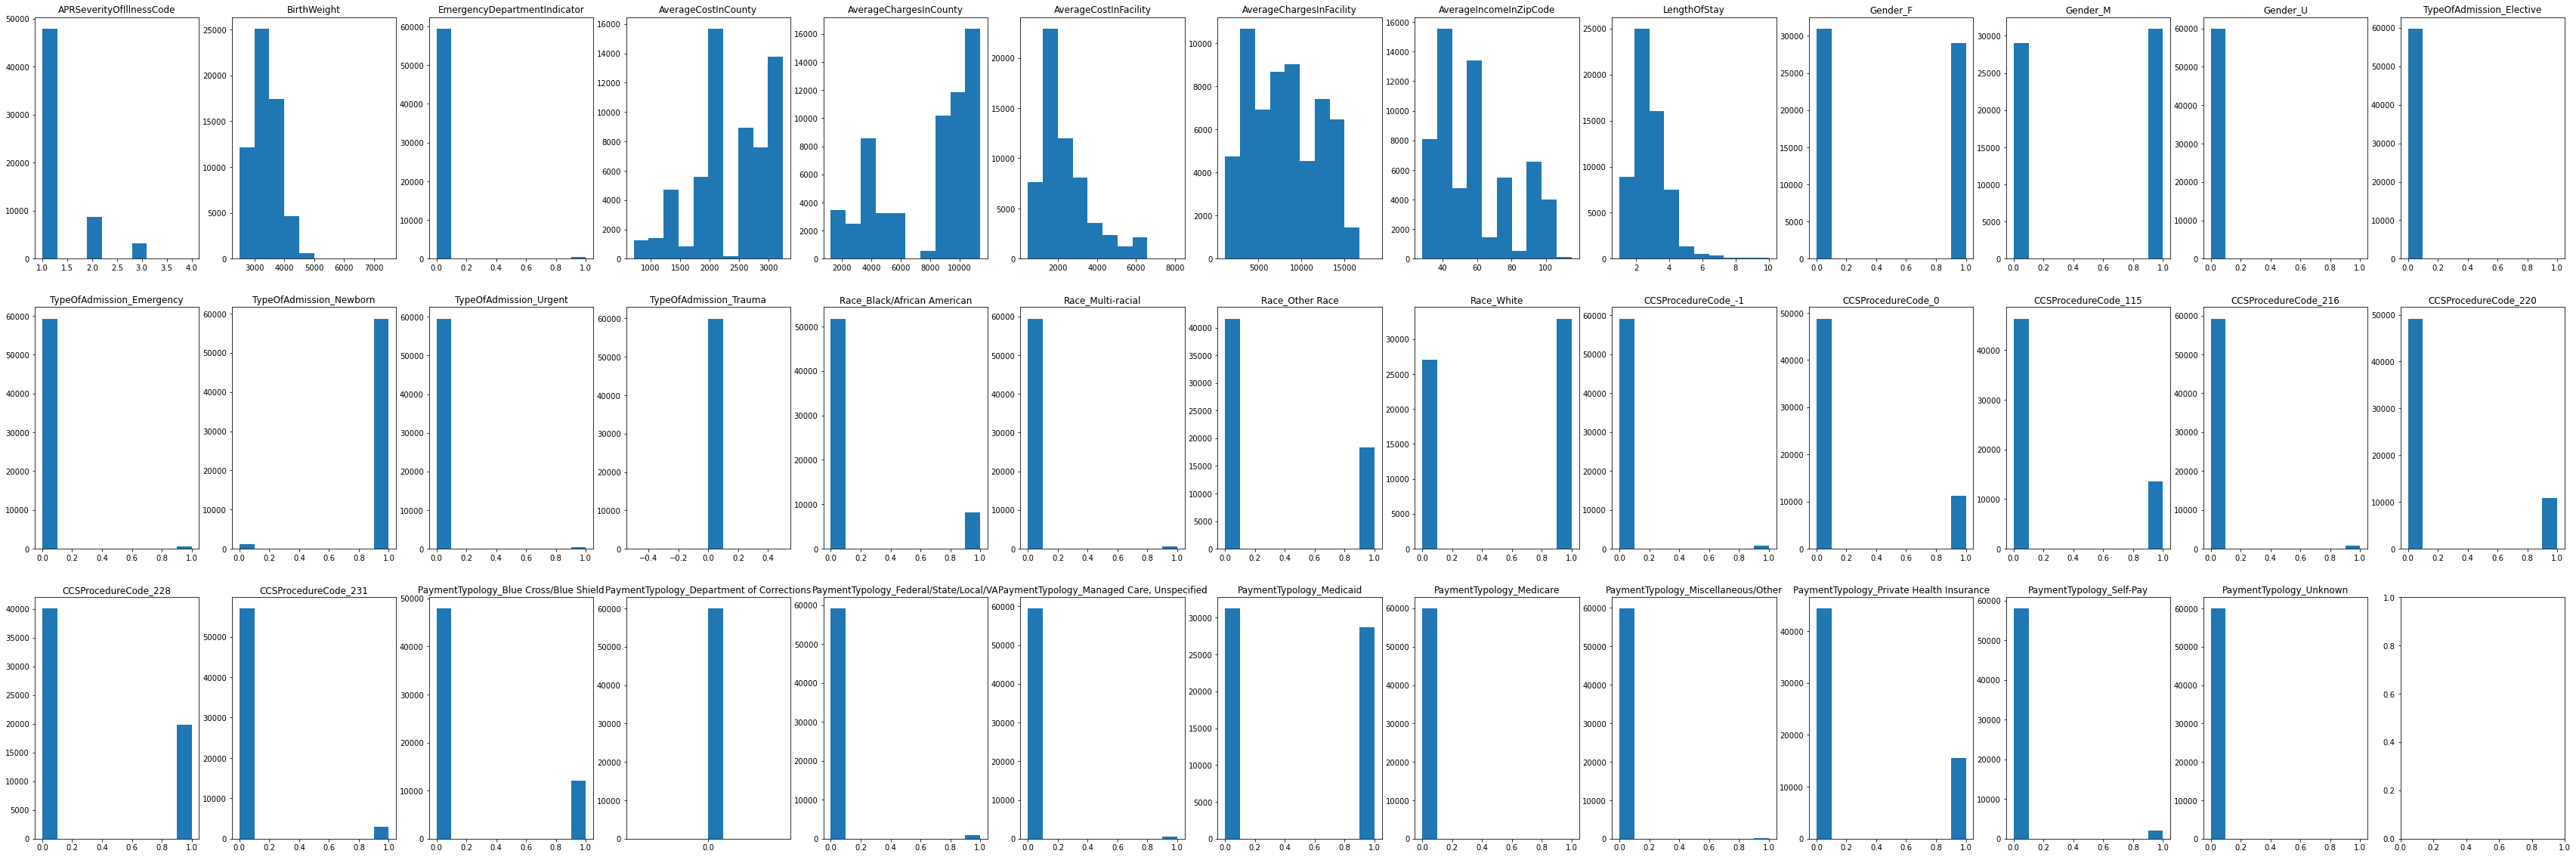

In [38]:
i = 0
j = 0
num_col = len(a_dataset.columns)

fig, axs = plt.subplots(3, 13,figsize=(60,20))
num_bins = 10


for col in a_dataset.columns:
    axs[j][i].hist(a_dataset[col], num_bins)
    axs[j][i].title.set_text(col)
       
    i +=1
    if i == 13:
        
        j += 1
        i = 0
    
plt.show()

<h3>We will now perform Feature scaling on the 7 non-categorical columns</h3>

Text(0.5, 1.0, 'After Standard Scaling')

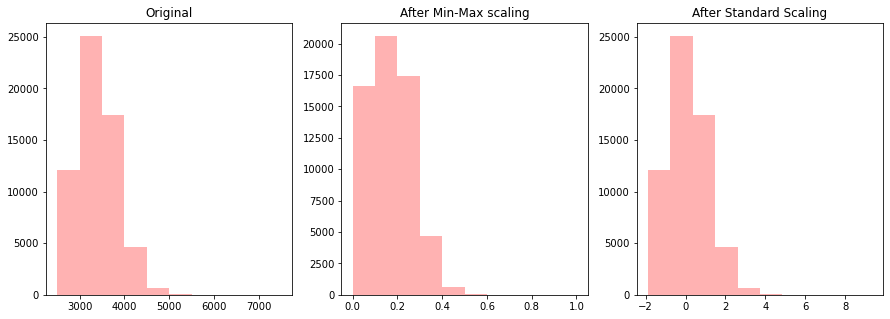

In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

MinMaxScaler_RM = MinMaxScaler().fit(a_dataset[['BirthWeight']])
RM_minmax = MinMaxScaler_RM.transform(a_dataset[['BirthWeight']])

StandardScaler_RM = StandardScaler().fit(a_dataset[['BirthWeight']])
RM_standard = StandardScaler_RM.transform(a_dataset[['BirthWeight']])
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(a_dataset[['BirthWeight']], alpha=0.3, color='r')
plt.title("Original")

plt.subplot(1,3,2)
plt.hist(RM_minmax, alpha=0.3, color='r')
plt.title("After Min-Max scaling")

plt.subplot(1,3,3)
plt.hist(RM_standard, alpha=0.3, color='r')
plt.title("After Standard Scaling")



## As standard scaling is more similar to the original, we will use this transoformation
### We will first power transform the skewed data 

In [40]:
#a_dataset['BirthWeight'] = StandardScaler_RM.transform(a_dataset[['BirthWeight']])
from sklearn.preprocessing import PowerTransformer



standscale_powerdtransformed_attributes = ['AverageCostInFacility','AverageChargesInCounty']
standScale_attributes = ['BirthWeight','AverageCostInCounty','AverageChargesInFacility','AverageIncomeInZipCode']
non_encode_attributes = ['AverageCostInFacility','AverageChargesInCounty', 'BirthWeight','AverageCostInCounty','AverageChargesInFacility','AverageIncomeInZipCode']
a_dataset_scaled = a_dataset.copy()
test_dataset_scaled = test_dataset.copy()

standardscaler = StandardScaler().fit(a_dataset_scaled.loc[:, standScale_attributes])
test_standardscaler = StandardScaler().fit(test_dataset_scaled.loc[:, standScale_attributes])

a_dataset_scaled.loc[:, standScale_attributes] = standardscaler.transform(a_dataset_scaled.loc[:, standScale_attributes])
test_dataset_scaled.loc[:, standScale_attributes] = test_standardscaler.transform(test_dataset_scaled.loc[:, standScale_attributes])

powertransformer = PowerTransformer(method='yeo-johnson', standardize=False).fit(a_dataset_scaled.loc[:, standscale_powerdtransformed_attributes])
test_powertransformer = PowerTransformer(method='yeo-johnson', standardize=False).fit(test_dataset_scaled.loc[:, standscale_powerdtransformed_attributes])

a_dataset_scaled.loc[:, standscale_powerdtransformed_attributes] = powertransformer.transform(a_dataset_scaled.loc[:, standscale_powerdtransformed_attributes])                        
test_dataset_scaled.loc[:, standscale_powerdtransformed_attributes] = test_powertransformer.transform(test_dataset_scaled.loc[:, standscale_powerdtransformed_attributes])      

standardscalerr_pt = StandardScaler().fit(a_dataset_scaled.loc[:, standscale_powerdtransformed_attributes])
test_standardscalerr_pt = StandardScaler().fit(test_dataset_scaled.loc[:, standscale_powerdtransformed_attributes])

a_dataset_scaled.loc[:, standscale_powerdtransformed_attributes] = standardscalerr_pt.transform(a_dataset_scaled.loc[:, standscale_powerdtransformed_attributes])
test_dataset_scaled.loc[:, standscale_powerdtransformed_attributes] = test_standardscalerr_pt.transform(test_dataset_scaled.loc[:, standscale_powerdtransformed_attributes])




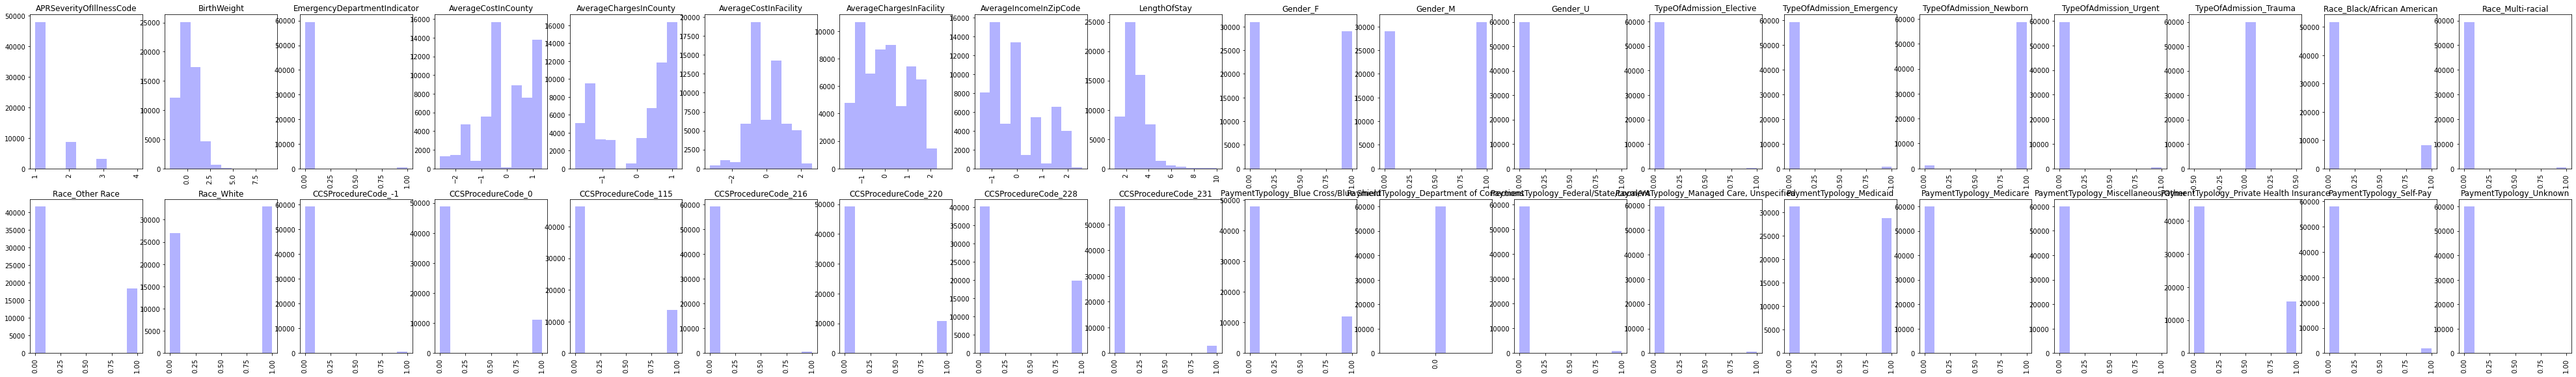

In [41]:
plt.figure(figsize=(70,20))
for i, col in enumerate(a_dataset_scaled.columns):
    plt.subplot(4,19,i+1)
    plt.hist(a_dataset_scaled[col], alpha=0.3, color='b', density=False)
    plt.title(col)
    plt.xticks(rotation='vertical')


In [42]:
"""a_dataset['BirthWeight'] = StandardScaler_RM.transform(a_dataset[['BirthWeight']])
a_dataset['BirthWeight'] = StandardScaler_RM.transform(a_dataset[['BirthWeight']])
a_dataset['BirthWeight'] = StandardScaler_RM.transform(a_dataset[['BirthWeight']])
"""

"a_dataset['BirthWeight'] = StandardScaler_RM.transform(a_dataset[['BirthWeight']])\na_dataset['BirthWeight'] = StandardScaler_RM.transform(a_dataset[['BirthWeight']])\na_dataset['BirthWeight'] = StandardScaler_RM.transform(a_dataset[['BirthWeight']])\n"

### Transform column "LengthOfStay" to 1 (if LengthOfStay < 4) or 0 if ( Length of stay >= 4)

In [43]:
a_dataset.loc[a_dataset.LengthOfStay < 4, "LengthOfStay"] = 0
a_dataset.loc[a_dataset.LengthOfStay > 3, "LengthOfStay"] = 1


In [44]:
a_dataset

,APRSeverityOfIllnessCode,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,Gender_F,...,PaymentTypology_Blue Cross/Blue Shield,PaymentTypology_Department of Corrections,PaymentTypology_Federal/State/Local/VA,"PaymentTypology_Managed Care, Unspecified",PaymentTypology_Medicaid,PaymentTypology_Medicare,PaymentTypology_Miscellaneous/Other,PaymentTypology_Private Health Insurance,PaymentTypology_Self-Pay,PaymentTypology_Unknown
0,1,3700,0,2611,9227,1751,8951,45,0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,2900,0,3242,8966,3338,6409,34,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,3200,0,3155,11381,4980,9323,45,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,3300,0,3155,11381,5826,15680,59,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,2600,0,2611,9227,6000,14344,59,0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59961,1,3600,0,1826,4190,1551,3715,36,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59962,2,3300,0,1826,4190,1551,3715,55,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59963,2,3400,0,1826,4190,1551,3715,55,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59964,2,3100,0,1826,4190,1551,3715,55,1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Start building Regression model
We will start by splitting training data into training and validation

In [45]:
print(a_dataset.shape[1])

38


In [46]:

from sklearn.model_selection import train_test_split

drop_indices = np.random.choice(a_dataset.index, 20000, replace=False)
a_subset = a_dataset #a_dataset.drop(drop_indices) #a_dataset

with pd.option_context('mode.chained_assignment', None):
    a_subset, val_data = train_test_split(a_subset, test_size= 0.25,
                                          shuffle = True, random_state =0)
    
print(a_subset.shape[0], val_data.shape[0])


44974 14992


In [47]:

print(a_subset.shape[0])

44974


In [48]:
test_dataset.columns

Index(['APRSeverityOfIllnessCode', 'BirthWeight',
       'EmergencyDepartmentIndicator', 'AverageCostInCounty',
       'AverageChargesInCounty', 'AverageCostInFacility',
       'AverageChargesInFacility', 'AverageIncomeInZipCode', 'Gender_F',
       'Gender_M', 'Gender_U', 'TypeOfAdmission_Elective',
       'TypeOfAdmission_Emergency', 'TypeOfAdmission_Newborn',
       'TypeOfAdmission_Trauma', 'TypeOfAdmission_Urgent',
       'Race_Black/African American', 'Race_Multi-racial', 'Race_Other Race',
       'Race_White', 'CCSProcedureCode_-1', 'CCSProcedureCode_0',
       'CCSProcedureCode_115', 'CCSProcedureCode_216', 'CCSProcedureCode_220',
       'CCSProcedureCode_228', 'CCSProcedureCode_231',
       'PaymentTypology_Blue Cross/Blue Shield',
       'PaymentTypology_Department of Corrections',
       'PaymentTypology_Federal/State/Local/VA',
       'PaymentTypology_Managed Care, Unspecified', 'PaymentTypology_Medicaid',
       'PaymentTypology_Medicare', 'PaymentTypology_Miscellaneous/Ot

In [49]:
a_subset.columns.difference(test_dataset.columns)

Index(['LengthOfStay'], dtype='object')

In [50]:
non_encode_attributes = ['AverageCostInFacility','AverageChargesInCounty', 'BirthWeight','AverageCostInCounty','AverageChargesInFacility','AverageIncomeInZipCode']
train_x= a_subset[['AverageCostInFacility','AverageChargesInCounty', 'BirthWeight','AverageCostInCounty','AverageChargesInFacility','AverageIncomeInZipCode']].copy()
train_x = train_x.to_numpy()


test_x = test_dataset[['AverageCostInFacility','AverageChargesInCounty', 'BirthWeight','AverageCostInCounty','AverageChargesInFacility','AverageIncomeInZipCode']].copy()
test_x = test_x.to_numpy()

train_x_encoded = a_subset.drop(['LengthOfStay', 'AverageCostInFacility','AverageChargesInCounty', 'BirthWeight','AverageCostInCounty','AverageChargesInFacility','AverageIncomeInZipCode'], axis = 1).to_numpy()
eh = a_subset.drop(['LengthOfStay', 'AverageCostInFacility','AverageChargesInCounty', 'BirthWeight','AverageCostInCounty','AverageChargesInFacility','AverageIncomeInZipCode'], axis = 1)
eee = test_dataset.drop([ 'AverageCostInFacility','AverageChargesInCounty', 'BirthWeight','AverageCostInCounty','AverageChargesInFacility','AverageIncomeInZipCode'], axis = 1)
train_y = a_subset[['LengthOfStay']].to_numpy()

test_x_encoded = test_dataset.drop([ 'AverageCostInFacility','AverageChargesInCounty', 'BirthWeight','AverageCostInCounty','AverageChargesInFacility','AverageIncomeInZipCode'], axis = 1).to_numpy()

val_x = val_data[['AverageCostInFacility','AverageChargesInCounty', 'BirthWeight','AverageCostInCounty','AverageChargesInFacility','AverageIncomeInZipCode']].copy()
val_x = val_x.to_numpy()
val_x_encoded = val_data.drop(['LengthOfStay', 'AverageCostInFacility','AverageChargesInCounty', 'BirthWeight','AverageCostInCounty','AverageChargesInFacility','AverageIncomeInZipCode'], axis = 1).to_numpy()
val_y = val_data[['LengthOfStay']].to_numpy()

In [51]:


eee.columns.difference(eh.columns)

Index([], dtype='object')

In [52]:
eh

,APRSeverityOfIllnessCode,EmergencyDepartmentIndicator,Gender_F,Gender_M,Gender_U,TypeOfAdmission_Elective,TypeOfAdmission_Emergency,TypeOfAdmission_Newborn,TypeOfAdmission_Urgent,TypeOfAdmission_Trauma,...,PaymentTypology_Blue Cross/Blue Shield,PaymentTypology_Department of Corrections,PaymentTypology_Federal/State/Local/VA,"PaymentTypology_Managed Care, Unspecified",PaymentTypology_Medicaid,PaymentTypology_Medicare,PaymentTypology_Miscellaneous/Other,PaymentTypology_Private Health Insurance,PaymentTypology_Self-Pay,PaymentTypology_Unknown
12811,2,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17727,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
38334,3,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
58110,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3578,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45891,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52416,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
42613,2,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
43567,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [53]:
from sklearn.metrics import f1_score
print(train_x)

[[ 3739  9917  3200  2041  7583    59]
 [ 1967  4620  2900  2158  4904    41]
 [ 1605  9917  3600  2041 12083    59]
 ...
 [ 1052 11381  3500  3155 11314    74]
 [ 1162 11381  3600  3155  9015    45]
 [ 2138  6179  3500  2756  7445    68]]


In [54]:
from sklearn.preprocessing import PolynomialFeatures 

poly = PolynomialFeatures(2)
poly.fit(train_x)
train_x = poly.transform(train_x)
test_x = poly.transform(test_x)
val_x = poly.transform(val_x)



In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_x)

train_x = scaler.transform(train_x)
val_x = scaler.transform(val_x)
concat_train_X = np.concatenate([train_x,train_x_encoded],axis = 1)
concat_val_X = np.concatenate([val_x, val_x_encoded],axis =1)
test_x = scaler.transform(test_x)



In [56]:
test_concat = np.concatenate([test_x, test_x_encoded],axis =1)

In [57]:
# Re-add onehot-encoded values 
print(concat_train_X[0])

[0.0 1.0814173297842773 0.6039050673109924 -0.30645068995369446
 -0.5145718397291703 -0.09271414710791605 -0.035483061392180826
 0.8223787522740829 1.0501378926552398 0.9398731020456943
 0.3642850838353878 0.436155202713549 0.8199050619786502 0.538784649081051
 0.46785840488166086 -0.015353384640822407 0.031004714884306343
 0.2438653119441625 -0.35388553135849204 -0.5795368004923073
 -0.1596683013131377 -0.13784916153884544 -0.6468042371929704
 -0.391150620444627 -0.340769890569622 -0.3149473179377674
 -0.1674218969226258 -0.1852246746877387 2 0 0.0 1.0 0.0 0.0 0.0 1.0 0.0
 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 '0.0' 0.0 0.0 1.0 0.0
 0.0 0.0 0.0 0.0]


In [58]:
"""from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, penalty='none', solver='saga', 
                         max_iter=1500, 
                         class_weight='balanced').fit(concat_train_X, train_y.ravel())




train_pred = clf.predict(concat_train_X)
val_pred = clf.predict(concat_val_X)
    
train_f1 = f1_score(train_y, train_pred, average='macro')
val_f1 = f1_score(val_y, val_pred, average='macro')
print("Train F1-Score score: {:.3f}".format(train_f1))
print("Validation F1-Score score: {:.3f}".format(val_f1))"""

'from sklearn.linear_model import LogisticRegression\nclf = LogisticRegression(random_state=0, penalty=\'none\', solver=\'saga\', \n                         max_iter=1500, \n                         class_weight=\'balanced\').fit(concat_train_X, train_y.ravel())\n\n\n\n\ntrain_pred = clf.predict(concat_train_X)\nval_pred = clf.predict(concat_val_X)\n    \ntrain_f1 = f1_score(train_y, train_pred, average=\'macro\')\nval_f1 = f1_score(val_y, val_pred, average=\'macro\')\nprint("Train F1-Score score: {:.3f}".format(train_f1))\nprint("Validation F1-Score score: {:.3f}".format(val_f1))'

In [59]:
"""lambda_paras = np.logspace(-5, 1, num=25)    # establish the lambda values to test (grid)

# Then search
train_performace = list()
valid_performace = list()

for lambda_para in lambda_paras:
    clf = LogisticRegression(random_state=0, C = 1.0/lambda_para ,solver='saga', 
                         max_iter=1500, 
                         class_weight='balanced').fit(concat_train_X, train_y.ravel())
    
    train_pred = clf.predict(concat_train_X)
    val_pred = clf.predict(concat_val_X)
    
    train_f1 = f1_score(train_y, train_pred, average='macro')
    val_f1 = f1_score(val_y, val_pred, average='macro')
    
    train_performace.append(train_f1)
    valid_performace.append(val_f1)"""

"lambda_paras = np.logspace(-5, 1, num=25)    # establish the lambda values to test (grid)\n\n# Then search\ntrain_performace = list()\nvalid_performace = list()\n\nfor lambda_para in lambda_paras:\n    clf = LogisticRegression(random_state=0, C = 1.0/lambda_para ,solver='saga', \n                         max_iter=1500, \n                         class_weight='balanced').fit(concat_train_X, train_y.ravel())\n    \n    train_pred = clf.predict(concat_train_X)\n    val_pred = clf.predict(concat_val_X)\n    \n    train_f1 = f1_score(train_y, train_pred, average='macro')\n    val_f1 = f1_score(val_y, val_pred, average='macro')\n    \n    train_performace.append(train_f1)\n    valid_performace.append(val_f1)"

In [60]:
"""plt.plot([1.0/lambda_para for lambda_para in lambda_paras], 
         [tp for tp in train_performace], 'r-')
plt.plot([1.0/lambda_para for lambda_para in lambda_paras], 
         [vp for vp in valid_performace], 'b--')
plt.xscale("log")
plt.ylabel('F1 Score')
plt.xlabel('Model Capacity')
plt.legend(['Training','Validation'])
plt.show()"""

'plt.plot([1.0/lambda_para for lambda_para in lambda_paras], \n         [tp for tp in train_performace], \'r-\')\nplt.plot([1.0/lambda_para for lambda_para in lambda_paras], \n         [vp for vp in valid_performace], \'b--\')\nplt.xscale("log")\nplt.ylabel(\'F1 Score\')\nplt.xlabel(\'Model Capacity\')\nplt.legend([\'Training\',\'Validation\'])\nplt.show()'

In [61]:
C_val = 0.1584893192

In [62]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, C = C_val, solver='saga', 
                         max_iter=1500, 
                         class_weight='balanced').fit(concat_train_X, train_y.ravel())
train_pred = clf.predict(concat_train_X)
val_pred = clf.predict(concat_val_X)
    
train_f1 = f1_score(train_y, train_pred, average='macro')
val_f1 = f1_score(val_y, val_pred, average='macro')
print("Train F1-Score score: {:.3f}".format(train_f1))
print("Validation F1-Score score: {:.3f}".format(val_f1))

Train F1-Score score: 0.617
Validation F1-Score score: 0.623


In [63]:
from sklearn.metrics import classification_report

test_pred = clf.predict(test_concat)
#train_f1 = f1_score(train_y, test_pred, average='macro')  
print(test_concat.shape)

print(concat_train_X.shape)


(69177, 59)
(44974, 59)


In [64]:
print(test_pred)


export_df = pd.DataFrame(test_pred)

export_df["ID"] = export_df.index + 1
export_df = export_df.rename(columns={0:"LengthOfStay"})

[1 0 0 ... 0 0 0]


In [65]:
export_df.columns

Index(['LengthOfStay', 'ID'], dtype='object')

In [66]:
export_df = export_df[["ID", "LengthOfStay"]]

In [67]:
export_df

,ID,LengthOfStay
0,1,1
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
69172,69173,0
69173,69174,1
69174,69175,0
69175,69176,0


In [68]:
export_df.to_csv(r's3723189_predictions.csv', index = False, header = True)